In [1]:
import pytesseract
import keras_ocr
import easyocr
import matplotlib.pyplot as plt
import cv2
import argparse
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
%matplotlib inline

2021-11-20 17:18:20.577399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/namtran/anaconda3/envs/ocr/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-20 17:18:20.577436: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
config = Cfg.load_config_from_name('vgg_transformer')
# config['weights'] = './weights/transformerocr.pth'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cpu'
config['predictor']['beamsearch']=False
detector = Predictor(config)

File exists: /home/namtran/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA


In [3]:
def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [4]:
text_reader = easyocr.Reader(['vi']) #Initialzing the ocr
# text_reader =  easyocr.Reader(['vi'], detector='DB', recognizer = 'Transformer')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
url = [
    "sample/cmnd_hng_11_001.jpg",
    "sample/cmnd_hoan_1.jpg",
    "sample/cmnd_Hong_M_Ngan.jpg",
    "sample/cmnd_H_Th_Thu_Tho_.jpg"
]
images = [ keras_ocr.tools.read(i) for i in url]

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


CÔNG HÒA X- HỌl CHỦ NGHĨA VIỆT NAM
Đéc lậP
Iydo
Hanh phúc
GlẨY CHỨNG
MINH NHÂN DÀN
sô
260894647
Ho ten;
IRẨNTHỊ KIMHỔNG
Sinh ngày-
05-06-1982
Nguyên quán:
Chí
íCông .
Iuy
Bình Ihuận
Nơi ĐKHK thưÙng trú:
Phan Rí Cứa
Tuy
Bình Thuận
Phong
Phongr


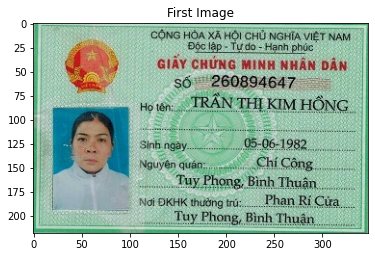

In [6]:
results = text_reader.readtext(images[0])
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[0])
plt.title("First Image");

In [7]:
nct = images[0]

In [8]:
for (bbox, text, prob) in results:
    # display the OCR'd text and associated probability
    print("[INFO] {:.4f}: {}".format(prob, text))
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    
    # cleanup the text and draw the box surrounding the text along
    # with the OCR'd text itself
#     text = cleanup_text(text)
    nct = cv2.rectangle(nct, tl, br, (0, 255, 0), 2)
#     nct = cv2.putText(nct, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

[INFO] 0.1688: CÔNG HÒA X- HỌl CHỦ NGHĨA VIỆT NAM
[INFO] 0.1743: Đéc lậP
[INFO] 0.6090: Iydo
[INFO] 0.9493: Hanh phúc
[INFO] 0.5914: GlẨY CHỨNG
[INFO] 0.4597: MINH NHÂN DÀN
[INFO] 0.3204: sô
[INFO] 1.0000: 260894647
[INFO] 0.7184: Ho ten;
[INFO] 0.5754: IRẨNTHỊ KIMHỔNG
[INFO] 0.8663: Sinh ngày-
[INFO] 0.7671: 05-06-1982
[INFO] 0.8947: Nguyên quán:
[INFO] 0.9995: Chí
[INFO] 0.1832: íCông .
[INFO] 0.9150: Iuy
[INFO] 0.8559: Bình Ihuận
[INFO] 0.4610: Nơi ĐKHK thưÙng trú:
[INFO] 0.5298: Phan Rí Cứa
[INFO] 0.9874: Tuy
[INFO] 0.6161: Bình Thuận
[INFO] 0.9727: Phong
[INFO] 0.9659: Phongr


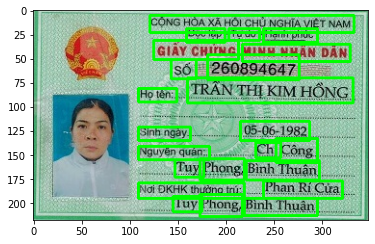

In [9]:
plt.imshow(nct)

CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM
Độc lập
Tự do
Hạnh phúc
GIẤY CHỨNG
MINH NHÂN DÂN
SỐ
260894647
Họ tên
TRẦN THỊ KIM HỒNG
Sinh ngày
05-06-1982
Nguyễn quán
Chí
Công
Tuy
Bình Thuận
Nơi ĐKHK thường trú:
Phan Rí Cửa
Tuy
Bình Thuận
Phong
Phong


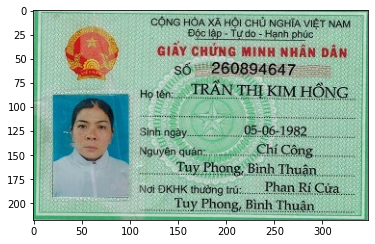

In [7]:
for (bbox, text, prob) in results:
    # display the OCR'd text and associated probability
#     print("[INFO] {:.4f}: {}".format(prob, text))
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    
    min_x = min(tl[0], tr[0], br[0], bl[0])
    max_x = max(tl[0], tr[0], br[0], bl[0])
    min_y = min(tl[1], tr[1], br[1], bl[1])
    max_y = max(tl[1], tr[1], br[1], bl[1])
    
#     print(min_y, max_y, min_x, max_x)
    
#     for (bb, tt, pp) in text_reader.readtext(images[0][min_y:max_y,min_x:max_x]):
#         plt.imshow(images[0][min_y:max_y,min_x:max_x])
#         tt = cleanup_text(tt)
#         print("[INFO] {:.4f}: {}".format(pp, tt))

    s = detector.predict(Image.fromarray(images[0][min_y:max_y,min_x:max_x])) 
    print(s)
    
    # cleanup the text and draw the box surrounding the text along
    # with the OCR'd text itself
#     text = cleanup_text(text)
#     nct = cv2.rectangle(nct, tl, br, (0, 255, 0), 2)
plt.imshow(images[0])

In [ ]:
{
    name: "TRẦN THỊ KIM HỒNG",
    ID: "260894647",
    hometown: "",
    address: "",
}

In [11]:
results[9]

([[160, 70], [332, 70], [332, 96], [160, 96]],
 'IRẨNTHỊ KIMHỔNG',
 0.5754446113143526)

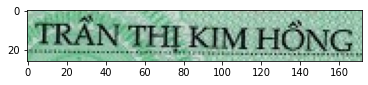

In [14]:
plt.imshow(images[0][70:96,160:332])

In [23]:
im = Image.fromarray(images[0][70:96,160:332])

In [24]:
im

In [15]:
check = images[0][70:96,160:332]

In [16]:
r = text_reader.readtext(check)

In [17]:
for (bbox, text, prob) in r:
    print(text)

IRẨNTHỊ KIMHỔNG


In [5]:
results[0][0]

[[121, 5], [333, 5], [333, 23], [121, 23]]

In [6]:
(tl, tr, br, bl) = results[0][0]
tl = (int(tl[0]), int(tl[1]))
tr = (int(tr[0]), int(tr[1]))
br = (int(br[0]), int(br[1]))
bl = (int(bl[0]), int(bl[1]))

In [7]:
tl, tr, br, bl

((121, 5), (333, 5), (333, 23), (121, 23))

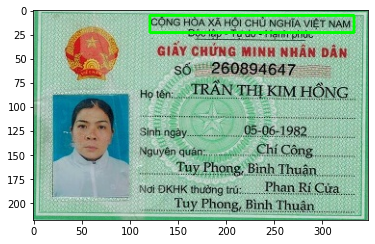

In [8]:
plt.imshow(cv2.rectangle(images[0], tl, br, (0, 255, 0), 2))

In [9]:
a = cv2.rectangle(images[0], tl, br, (0, 255, 0), 2)

In [11]:
(tl, tr, br, bl) = results[1][0]
tl = (int(tl[0]), int(tl[1]))
tr = (int(tr[0]), int(tr[1]))
br = (int(br[0]), int(br[1]))
bl = (int(bl[0]), int(bl[1]))
tl, tr, br, bl

((159, 19), (199, 19), (199, 33), (159, 33))

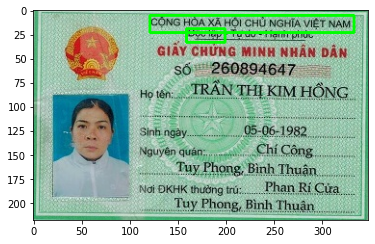

In [12]:
plt.imshow(cv2.rectangle(images[0], tl, br, (0, 255, 0), 2))

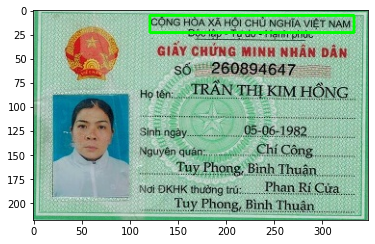

In [10]:
plt.imshow(a)

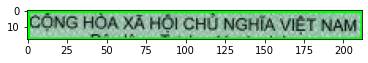

In [28]:
plt.imshow(images[0][5:23,121:333])

In [29]:
test_img = images[0][5:23,121:333]

In [30]:
r = text_reader.readtext(test_img)

In [32]:
for (bbox, text, prob) in r:
    print(text)

CỎNG HÒA XÃ HỌl CHỦ NGHĨA VIET NAM


In [20]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [34]:
config = Cfg.load_config_from_name('vgg_transformer')

In [35]:
# config['weights'] = './weights/transformerocr.pth'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cpu'
config['predictor']['beamsearch']=False

In [36]:
detector = Predictor(config)

File exists: /home/namtran/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA


In [46]:
s = detector.predict(img)
s

'TRONG CỘNG HOA XÃ HỘI CHU NGHĨA VIỆT NAM'

In [21]:
img = 'check.png'
img = Image.open(img)

In [22]:
img

In [43]:
cv2.imwrite("check.png", test_img)

True